# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

#### Biblioteca de importação

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
# %matplotlib notebook

#### Leitura do arquivo

In [2]:
sinasc = pd.read_csv('sinasc_RO_2019.csv')
sinasc.head(5)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### Verificação dos tipos dos dados 

In [3]:
df_sinasc = sinasc[['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE', 'CONSULTAS']]

In [4]:
df_sinasc.dtypes

APGAR1       float64
APGAR5       float64
SEXO          object
GESTACAO      object
ESTCIVMAE    float64
CONSULTAS      int64
dtype: object

#### Atributos categóricos

In [5]:
df_sinasc.select_dtypes('object').describe().transpose()

,count,unique,top,freq
SEXO,27024,2,Masculino,13886
GESTACAO,25796,6,37 a 41 semanas,22589


#### Atributos numéricos

In [6]:
df_sinasc.select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
APGAR1,26932.0,8.137457,0.984925,0.0,8.0,8.0,9.0,10.0
APGAR5,26925.0,9.179164,0.790574,0.0,9.0,9.0,10.0,10.0
ESTCIVMAE,26711.0,2.545318,1.671248,1.0,1.0,2.0,5.0,9.0
CONSULTAS,27028.0,3.576402,0.788492,1.0,3.0,4.0,4.0,9.0


#### Verificação de dados faltantes

In [7]:
df_sinasc.isna().sum()

APGAR1         96
APGAR5        103
SEXO            4
GESTACAO     1232
ESTCIVMAE     317
CONSULTAS       0
dtype: int64

#### Limpeza dos dados NaN

In [8]:
df_sinasc = df_sinasc.dropna()

In [9]:
df_sinasc.isna().sum()

APGAR1       0
APGAR5       0
SEXO         0
GESTACAO     0
ESTCIVMAE    0
CONSULTAS    0
dtype: int64

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

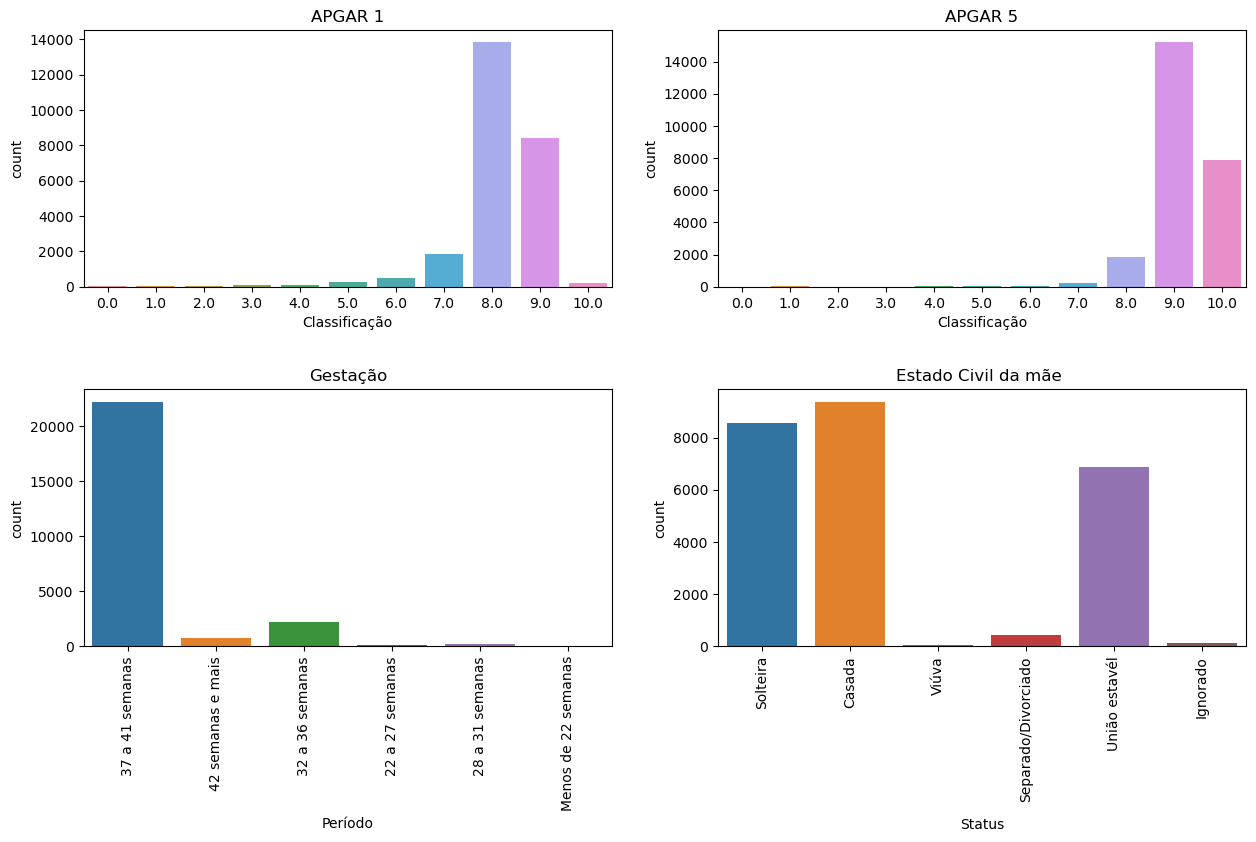

In [76]:
fig = plt.figure(figsize=(15, 8))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

ax1 = fig.add_subplot(2,2,1)
sns.countplot(data=df_sinasc, x='APGAR1')
ax1.set_title('APGAR 1')
ax1.set_xlabel('Classificação')

ax2 = fig.add_subplot(2,2,2)
sns.countplot(data=df_sinasc, x='APGAR5')
ax2.set_title('APGAR 5')
ax2.set_xlabel('Classificação')

ax3 = fig.add_subplot(2,2,3)
sns.countplot(data=df_sinasc, x='GESTACAO')
ax3.set_title('Gestação')
ax3.set_xlabel('Período')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)

ax4 = fig.add_subplot(2,2,4)
sns.countplot(data=df_sinasc, x='ESTCIVMAE')
ax4.set_title('Estado Civil da mãe ')
ax4.set_xticklabels(['Solteira', 'Casada', 'Viúva', 'Separado/Divorciado', 'União estavél', 'Ignorado'], rotation=90)
ax4.set_xlabel('Status', labelpad=12)

plt.show()

Text(0.5, 1.0, 'Sexo do bebê')

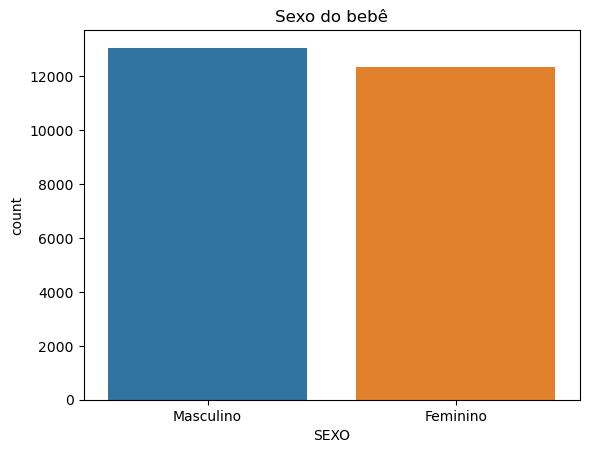

In [36]:
sns.countplot(x='SEXO', data=df_sinasc)
plt.title('Sexo do bebê')

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

<Axes: xlabel='CONSULTAS', ylabel='APGAR5'>

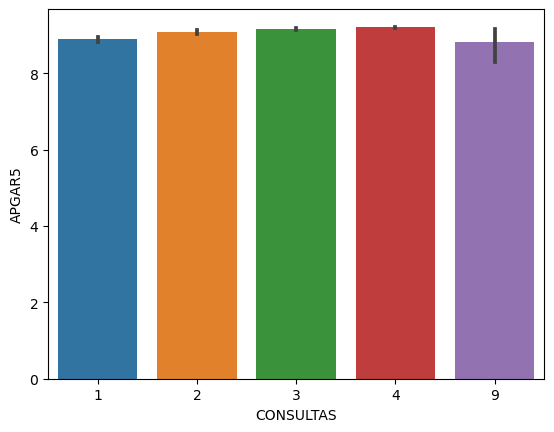

In [37]:
sns.barplot(x='CONSULTAS', y='APGAR5', data=df_sinasc)

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

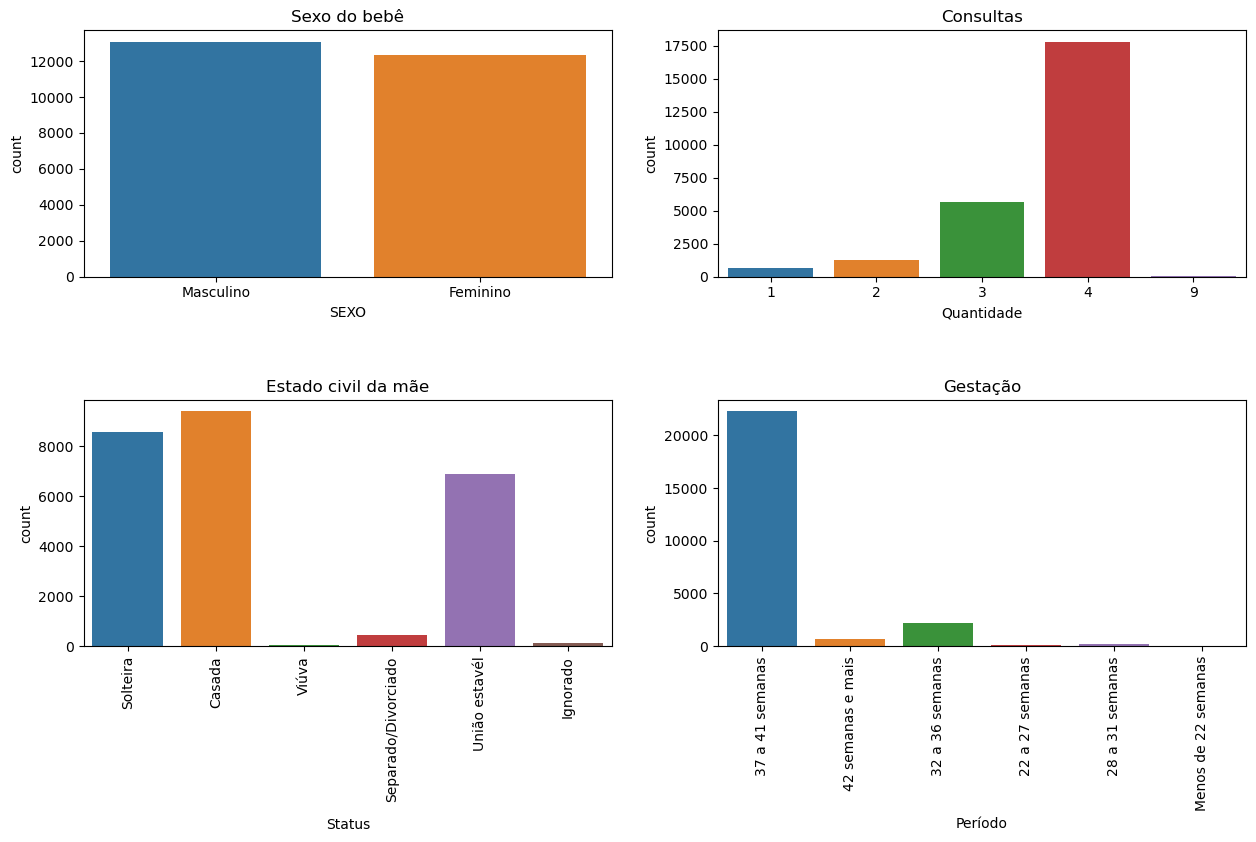

In [75]:
plt.close('all')
fig, axes = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.rc('figure', figsize=(15, 8))

ax1 = sns.countplot(ax=axes[0, 0], data=df_sinasc, x='SEXO')
ax1.set_title('Sexo do bebê')

ax2 = sns.countplot(ax=axes[0, 1], data=df_sinasc, x='CONSULTAS')
ax2.set_title('Consultas')
ax2.set_xlabel('Quantidade')

ax3 = sns.countplot(ax=axes[1, 0], data=df_sinasc, x='ESTCIVMAE')
ax3.set_title('Estado civil da mãe')
ax3.set_xlabel('status')
ax3.set_xticklabels(['Solteira', 'Casada', 'Viúva', 'Separado/Divorciado', 'União estavél', 'Ignorado'], rotation=90)
ax3.set_xlabel('Status', labelpad=12)

ax4 = sns.countplot(ax=axes[1, 1], data=df_sinasc, x='GESTACAO')
ax4.set_title('Gestação')
ax4.set_xlabel('Período')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)

plt.show()